# DEMO: THỰC HIỆN PHÂN TÍCH VÀ KHÁM PHÁ TẬP DỮ LIỆU UBER
---
* Đọc và tìm hiểu tập dữ liệu Uber (.csv)
* Sử dụng KMeans phân cụm dữ liệu theo kinh độ - vĩ độ các điểm đón khách (features: lat-lon)
* Thống kê, phân tích và trực quan hóa dữ liệu trích rút các thông tin có ích

---
Tập dữ liệu uber.csv bao gồm 829 275 bản ghi (lượt đón khách) trong khoảng thời gian từ 2014-08-01 00:00 tới 2014-08-31 23:59 (1 tháng), các bản ghi chứa thông tin:
1. Datetime: thời điểm đón khách
2. lat: kinh độ đón khách
3. lat: vĩ độ đón khách
4. base: Mã công ty quản lý phương tiện

<img src='Pic/uber_data.png' width='500px'>

---
*Copyright: Đặng Văn Nam - FIT.HUMG  - AIAcademy*

## 1.Đọc dữ liệu
---

In [1]:
#import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read file data
col_name = ['datetime','lat','lon','base']
df_uber = pd.read_csv("Data/uber.csv",
                      header=None,
                      names=col_name)
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  829275 non-null  object 
 1   lat       829275 non-null  float64
 2   lon       829275 non-null  float64
 3   base      829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


In [3]:
df_uber.head()

,datetime,lat,lon,base
0,2014-08-01 00:00:00,40.7290,-73.9422,B02598
1,2014-08-01 00:00:00,40.7476,-73.9871,B02598
2,2014-08-01 00:00:00,40.7424,-74.0044,B02598
3,2014-08-01 00:00:00,40.7510,-73.9869,B02598
4,2014-08-01 00:00:00,40.7406,-73.9902,B02598


In [4]:
df_uber.tail()

,datetime,lat,lon,base
829270,2014-08-31 23:59:00,40.7642,-73.2487,B02617
829271,2014-08-31 23:59:00,40.6448,-73.7818,B02682
829272,2014-08-31 23:59:00,40.8924,-73.9107,B02682
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764
829274,2014-08-31 23:59:00,40.7270,-73.9802,B02764


## 2. Phân cụm dữ liệu với Kmeans
---
Thực hiện phân cụm dữ liệu dựa theo vị trí đón khách (thuộc tính lat,lon); Phân ra thành 15 cụm trong khu vực nghiên cứu

<img src='Pic/Pic_map.jpg' width='700px'>

https://www.google.com/maps/d/edit?hl=vi&hl=vi&mid=1sPELzzl75ki6xmiFJ6YGlMVtIgKzkaOo&ll=40.487556685442655%2C-73.5513825&z=8

In [ ]:
df_uber.describe()

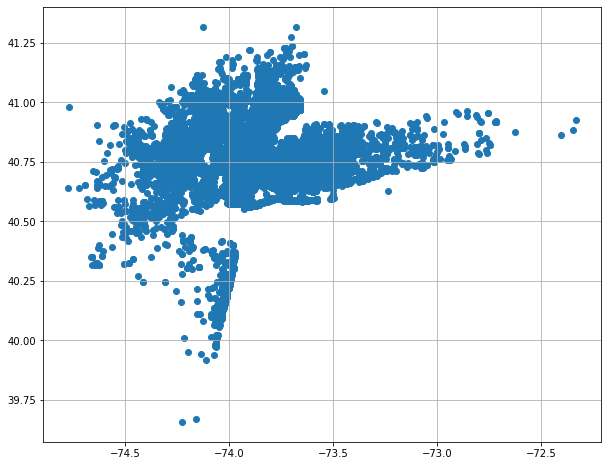

In [5]:
#Vị trí các điểm đón khách trên bản đồ
plt.figure(figsize=(10,8))
plt.scatter(x=df_uber.lon,y=df_uber.lat)
plt.xlim=[-74.8,-72.2]
plt.ylim=[39.7,41.3]
plt.grid(True)

Gom các vị trí đón khách theo kinh độ, vĩ độ gần nhau vào 15 cụm (0->14)
<img src='Pic/kmeans.png'>

In [6]:
from sklearn.cluster import KMeans

#Thực hiện phân thành 15 cụm
km = KMeans(n_clusters=15,
            init="k-means++",
            n_init = 10,
            max_iter=300, 
            tol=0.0001,  
            random_state= 111, 
            algorithm='elkan'
           )

#Lấy dữ liệu 2 cột lat, lon để thực hiện phân cụm
km.fit_predict(df_uber.iloc[:,[1,2]])

#Tạo cột Cluster để cho biết mẫu thuộc cụm nào
df_uber["cluster"] = km.labels_
df_uber.head(10)

,datetime,lat,lon,base,cluster
0,2014-08-01 00:00:00,40.7290,-73.9422,B02598,10
1,2014-08-01 00:00:00,40.7476,-73.9871,B02598,11
2,2014-08-01 00:00:00,40.7424,-74.0044,B02598,1
3,2014-08-01 00:00:00,40.7510,-73.9869,B02598,11
4,2014-08-01 00:00:00,40.7406,-73.9902,B02598,1
5,2014-08-01 00:00:00,40.6994,-73.9591,B02617,10
6,2014-08-01 00:00:00,40.6917,-73.9398,B02617,10
7,2014-08-01 00:00:00,40.7063,-73.9223,B02617,10
8,2014-08-01 00:00:00,40.6759,-74.0168,B02617,12
9,2014-08-01 00:00:00,40.7617,-73.9847,B02617,11


In [7]:
#Danh sách tâm của các cluster
center = km.cluster_centers_
print(center)

[[ 40.8556262  -73.92511626]
 [ 40.73627902 -73.99431818]
 [ 40.65136236 -73.78440169]
 [ 40.78120247 -73.95501682]
 [ 40.66634742 -73.97578362]
 [ 40.79691315 -73.24074708]
 [ 40.76094283 -73.8639586 ]
 [ 40.67178151 -74.40639041]
 [ 40.70584922 -74.18098368]
 [ 40.20228668 -74.04677746]
 [ 40.71049686 -73.94584021]
 [ 40.75918684 -73.98049088]
 [ 40.71435092 -74.00527469]
 [ 40.75018115 -73.61257698]
 [ 40.99907172 -73.77804416]]


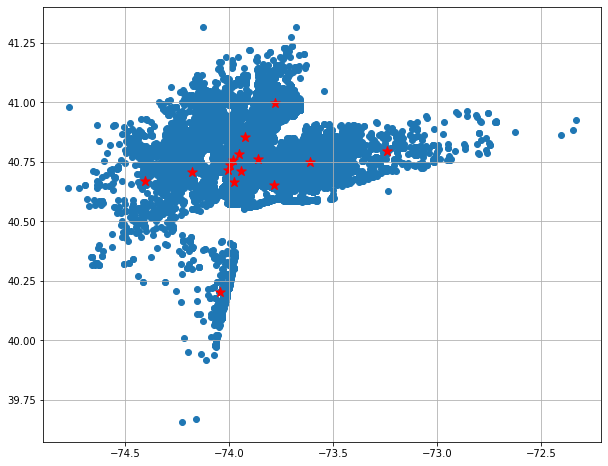

In [8]:
#Vị trí các điểm đón khách và tâm cụm trên bản đồ
plt.figure(figsize=(10,8))
plt.scatter(x=df_uber.lon,y=df_uber.lat)
plt.scatter(x=center[:,1],y=center[:,0],s=100,c='red',marker='*')
plt.xlim=[-74.8,-72.2]
plt.ylim=[39.7,41.3]
plt.grid(True)

## 3. Khám phá dữ liệu sau khi phân cụm
---
Thực hiện phân tích dữ liệu, rút ra các thông tin có ích của tập dữ liệu sau khi đã phân cụm. Trả lời cho một số câu hỏi như:


**1. Tôi nên đỗ xe ở khu vực nào thì sẽ có nhiều khách?**

In [ ]:
df_uber.head()

1     213360
11    205941
12    115300
3      87513
10     66565
4      53927
6      32389
2      24744
0      14402
8       7867
13      3071
14      2362
7        730
5        616
9        488
Name: cluster, dtype: int64


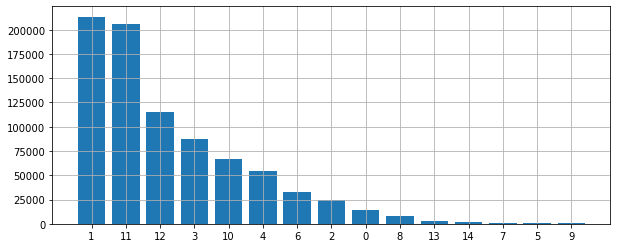

In [9]:
## Thông kê số lượt đón khách theo từng cụm
sum_cluster = df_uber.cluster.value_counts()
sum_cluster = sum_cluster.sort_values(ascending=False)
print(sum_cluster)

x=list(map(str,sum_cluster.index))
y=list(sum_cluster.values)

#sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
plt.bar(x, y)
plt.grid(True)
plt.show()

In [10]:
#Lấy danh sách 6 cụm có số lượng book nhiều nhất
list_cluster_max = [1,11,12,3,10,4]

In [11]:
#6 Cụm có số lượng book nhiều nhất chiếm tỷ lệ:
rate6 = sum_cluster.iloc[:6].sum()/sum_cluster.sum()
print('6 cụm này chiếm ', round(rate6*100,2),' %')

6 cụm này chiếm  89.55  %


In [12]:
#Tỷ lệ đón khách tại 2 cụm nhiều nhất (1,11)""
rate2 = sum_cluster.iloc[:2].sum()/sum_cluster.sum()
print('2 cụm này chiếm ', round(rate2*100,2),' %')

2 cụm này chiếm  50.56  %


<img src='Pic/insight.png' width='200px' align='left'>


 **NHẬN XÉT 1: Khu vực nào có số lượng khách book nhiều nhất?**
---
Có 6 cụm có số lượng khách tập trung đông nhất (>50 000) là các cụm: 1, 11, 12, 3, 10, 4 chiếm 90% tổng số lượt đặt xe trong tháng  (đặc biệt là khu vực cụm 1, 11 - Chiếm 50%) . 

* Nếu có xe tham gia Uber chúng ta nên đỗ để đón khách ở khu vực các cụm này
* Nếu là Công ty quản lý, điều phối tập trung xe tới các khu vực này đông hơn để đảm bảo phục vụ khách tốt hơn, giảm thời gian khách chờ, tăng hiệu quả hoạt động của phương tiện.

**2. Giờ nào trong ngày có số lượng khách book xe nhiều nhất?**

In [ ]:
df_uber.head()

In [13]:
#Chuyễn dữ liệu cột datetime về dạng thời gian để xử lý chuỗi thời gian
df_uber['datetime'] = pd.to_datetime(df_uber['datetime'])

In [14]:
df_new = df_uber.copy()
#Thiết lập cột Date làm index cho DataFrame
df_new.set_index('datetime',inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829275 entries, 2014-08-01 00:00:00 to 2014-08-31 23:59:00
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   lat      829275 non-null  float64
 1   lon      829275 non-null  float64
 2   base     829275 non-null  object 
 3   cluster  829275 non-null  int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 28.5+ MB


In [ ]:
df_new.head(10)

In [15]:
#Tổng hợp số liệu chuỗi thời gian về theo giờ. 
df_hours = df_new.resample('h').count() 

#Tính tổng số các lượt book theo từng giờ
by_time = df_hours.groupby(df_hours.index.time).sum()
by_time

,lat,lon,base,cluster
00:00:00,21451,21451,21451,21451
01:00:00,14471,14471,14471,14471
02:00:00,10105,10105,10105,10105
03:00:00,10376,10376,10376,10376
04:00:00,11774,11774,11774,11774
05:00:00,16525,16525,16525,16525
06:00:00,24907,24907,24907,24907
07:00:00,34064,34064,34064,34064
08:00:00,34566,34566,34566,34566
09:00:00,30195,30195,30195,30195


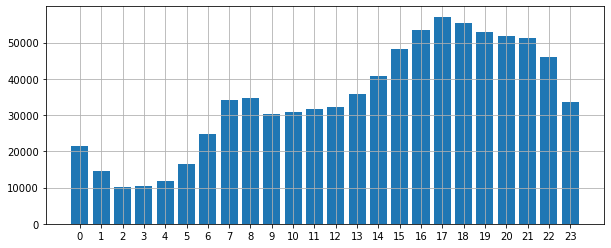

In [16]:
#Trực quan hóa bảng tổng hợp kết quả thống kê theo giờ lên đồ thị:
y1 = by_time.iloc[:,0].values
x1 = list(map(str,np.arange(0,24)))
plt.figure(figsize=(10,4))
plt.bar(x1, y1)
plt.grid(True)
plt.show()

<img src='Pic/insight.png' width='200px' align='left'>



**NHẬN XÉT 2: Giờ nào trong ngày nhiều người book nhất?**
---
Khách chủ yếu book xe vào khung giờ chiều và tối từ 14h --> 22h (lượng book>40 000); 
Buổi sáng khách book cao hơn ở thời điểm 7, 8h. Thời gian có lượng book thấp nhất trong ngày tập trung vào sáng sớm từ 1h --> 5h AM

**3. Trong 6 cụm có mật độ đặt xe cao nhất, giờ nào, cụm nào book cao hơn?**

In [ ]:
df_uber.info()

In [17]:
import datetime as dt
#Chỉ lấy dữ liệu của các cụm có số lượng book nhiều nhất (theo danh sách list_cluster_max)
df_new2 = df_uber.loc[df_uber.cluster.isin(list_cluster_max)]

#Tách dữ liệu giờ trong chuỗi thời gian thành cột mới.
df_new2['hour'] = df_new2["datetime"].dt.hour
df_new2.head()

,datetime,lat,lon,base,cluster,hour
0,2014-08-01,40.7290,-73.9422,B02598,10,0
1,2014-08-01,40.7476,-73.9871,B02598,11,0
2,2014-08-01,40.7424,-74.0044,B02598,1,0
3,2014-08-01,40.7510,-73.9869,B02598,11,0
4,2014-08-01,40.7406,-73.9902,B02598,1,0


In [18]:
#Chỉ lấy dữ liệu của 6 cụm cao nhất
df_new2['cluster'].value_counts()

1     213360
11    205941
12    115300
3      87513
10     66565
4      53927
Name: cluster, dtype: int64

In [19]:
#Thực hiện nhóm dữ liệu theo cụm, sau đó nhóm theo giờ
#Đếm sô lượt book theo từng cụm, và theo từng giờ trong ngày.
df_cluster_hour = df_new2[["base","cluster","hour"]].groupby(["cluster","hour"]).count()
df_cluster_hour

base
cluster hour      
1       0     7031
        1     5155
        2     3559
        3     3010
        4     2716
...            ...
12      19    8103
        20    7511
        21    7317
        22    6295
        23    4724

[144 rows x 1 columns]

In [20]:
df_cluster_hour.reset_index(inplace=True)
df_cluster_hour.head(24)

,cluster,hour,base
0,1,0,7031
1,1,1,5155
2,1,2,3559
3,1,3,3010
4,1,4,2716
5,1,5,3644
6,1,6,6285
7,1,7,8982
8,1,8,9492
9,1,9,6932


In [21]:
#convert dữ liệu từ row --> columns để trực quan hóa
df_cluster_hour = df_cluster_hour.pivot(index='hour',columns='cluster',values='base')
df_cluster_hour.reset_index(inplace=True)
df_cluster_hour.head(10)

cluster,hour,1,3,4,10,11,12
0,0,7031,1541,1668,2845,3725,2926
1,1,5155,962,988,2087,2380,1952
2,2,3559,637,699,1606,1641,1304
3,3,3010,1143,853,1346,1962,1304
4,4,2716,1501,992,1426,1998,1508
5,5,3644,2395,1522,1915,2844,1922
6,6,6285,4175,1935,2316,4634,2784
7,7,8982,6327,2316,2779,7275,3617
8,8,9492,5771,2343,2569,7769,3910
9,9,6932,4264,2167,2716,7131,3832


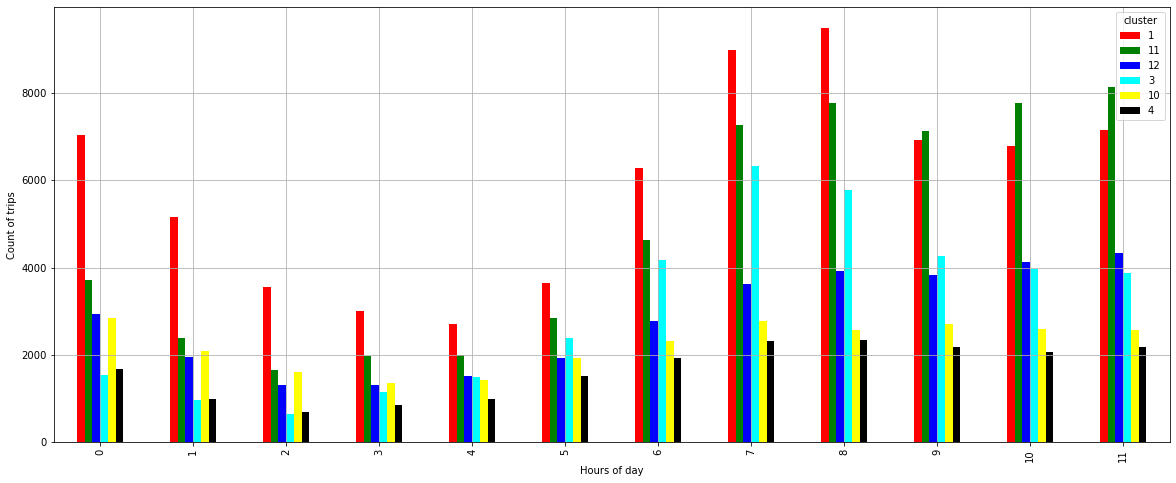

In [22]:
#Trực quan hóa dữ liệu trong khoảng thời gian từ 0 --> 11h
df_cluster_hour.iloc[:12,:].plot(x='hour', y=list_cluster_max, kind="bar",
         figsize=(20,8),
         color=['red','green','blue','cyan','yellow','black'])
plt.grid(True)
plt.xlabel("Hours of day")
plt.ylabel("Count of trips")
plt.show()

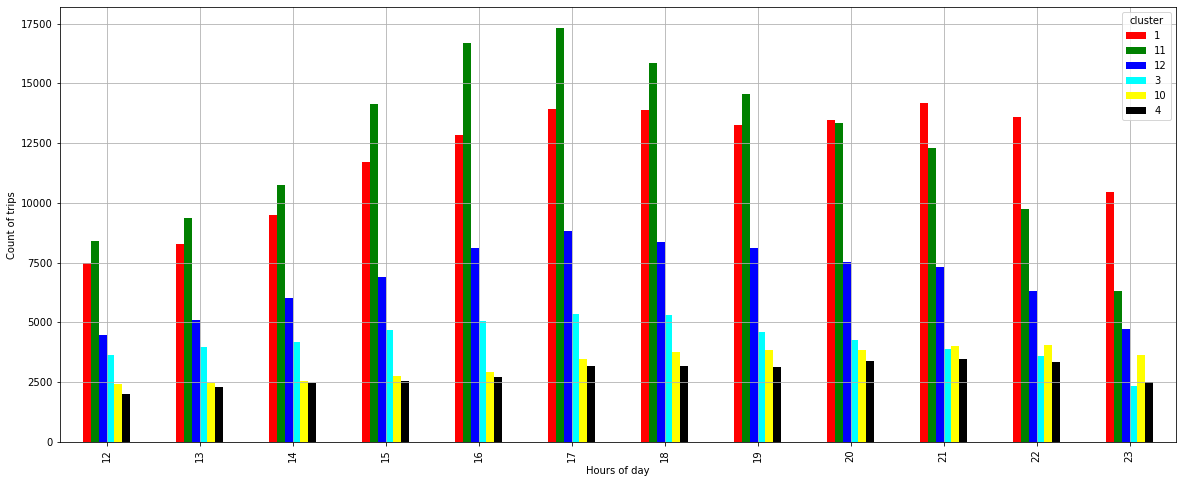

In [23]:
#Trực quan hóa dữ liệu trong khoảng thời gian từ 12 --> 23h
df_cluster_hour.iloc[12:,:].plot(x='hour', y=list_cluster_max, kind="bar",
         figsize=(20,8),
         color=['red','green','blue','cyan','yellow','black'])
plt.grid(True)
plt.xlabel("Hours of day")
plt.ylabel("Count of trips")
plt.show()

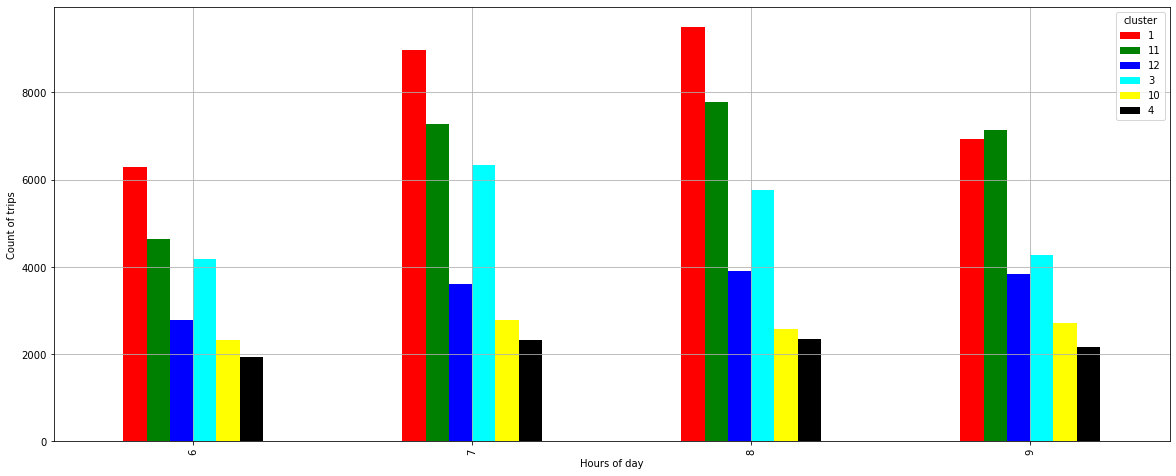

In [24]:
#Trực quan hóa dữ liệu trong khoảng thời gian cao điểm buổi sáng 6,7,8,9
df_cluster_hour.iloc[6:10,:].plot(x='hour', y=list_cluster_max, kind="bar",
         figsize=(20,8),
         color=['red','green','blue','cyan','yellow','black'])
plt.grid(True)
plt.xlabel("Hours of day")
plt.ylabel("Count of trips")
plt.show()

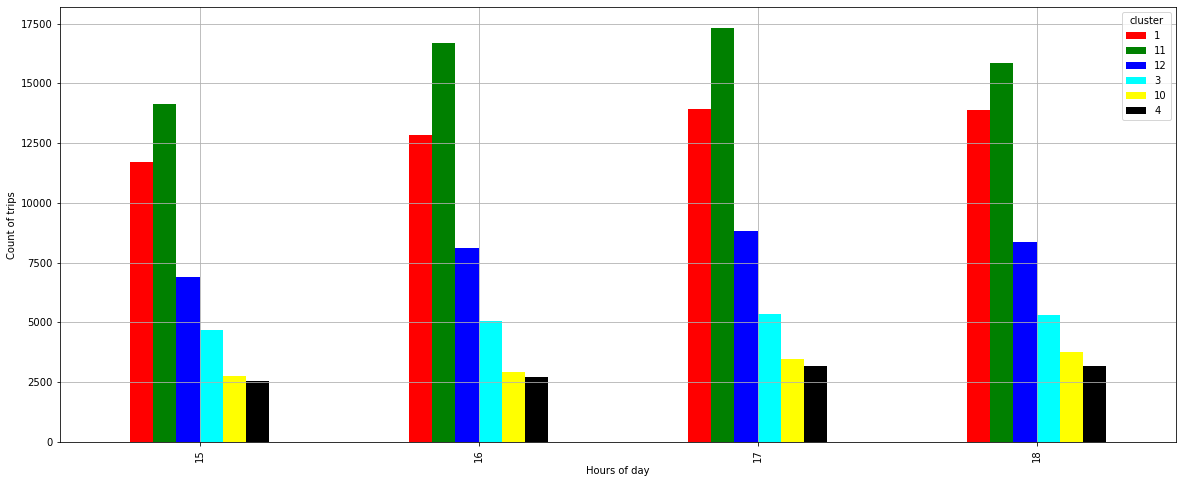

In [25]:
#Trực quan hóa dữ liệu trong khoảng thời gian cao điểm buổi chiều 15, 16, 17, 18, 19
df_cluster_hour.iloc[15:19,:].plot(x='hour', y=list_cluster_max, kind="bar",
         figsize=(20,8),
         color=['red','green','blue','cyan','yellow','black'])
plt.grid(True)
plt.xlabel("Hours of day")
plt.ylabel("Count of trips")
plt.show()

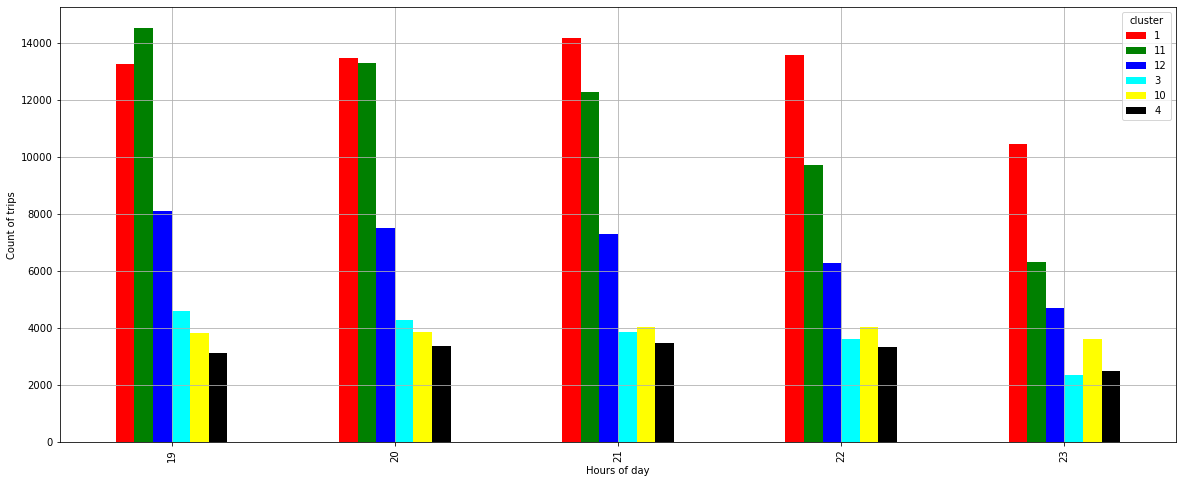

In [26]:
#Trực quan hóa dữ liệu trong khoảng thời gian cao điểm buổi tối 20, 21, 22, 23
df_cluster_hour.iloc[19:24,:].plot(x='hour', y=list_cluster_max, kind="bar",
         figsize=(20,8),
         color=['red','green','blue','cyan','yellow','black'])
plt.grid(True)
plt.xlabel("Hours of day")
plt.ylabel("Count of trips")
plt.show()

<img src='Pic/insight.png' width='200px' align='left'>



**NHẬN XÉT 3: Giờ nào, cụm nào nhiều người book nhất?**
---
* Trong khoảng từ 0h-8h sáng và từ 20h - 23h khách book cao nhất ở khu vực cụm 1
* Từ 9h - 19h, khách lại book cao nhất ở khu vực cụm 11

Dựa vào số lượng book theo từng giờ, từng cụm để có thể tối ưu việc đỗ xe, điều chuyển và phân phối xe hợp lý

<img src='Pic/action.jpg'>